## Metrics Evaluation

In [1]:
import pandas as pd
import os
import sys
import glob

In [2]:
def find_results(base_dir):
    val_dfs = []
    minds_test_dfs = []
    malta_test_dfs = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # check if file exists and if it ends with validation_results.csv
            if file.endswith('validation_results.csv'):
                val_df = pd.read_csv(os.path.join(root, file))
                val_df['model_name'] = root.split('/')[-1]
                val_dfs.append(val_df)
            elif file.startswith('malta_test'):
                malta_test_df = pd.read_csv(os.path.join(root, file))
                malta_test_df['model_name'] = root.split('/')[-1]
                malta_test_dfs.append(malta_test_df)
            elif file.startswith('minds_test'):
                minds_test_df = pd.read_csv(os.path.join(root, file))
                minds_test_df['model_name'] = root.split('/')[-1]
                minds_test_dfs.append(minds_test_df)
    val_df = pd.concat(val_dfs)
    malta_test_df = pd.concat(malta_test_dfs)
    minds_test_df = pd.concat(minds_test_dfs)
    
    return val_df, minds_test_df, malta_test_df

In [3]:
def group_metrics_by_intensity(df, sort_ascending=True):

    # Extract intensity and seed from experiment name
    df[['intensity', 'seed']] = df['exp_name'].str.extract(r'_(\d+\.\d+)_(\d+)$')
    df['intensity'] = df['intensity'].astype(float)
    df['seed'] = df['seed'].astype(int)
    
    # Filter for overall metrics only
    if 'dictionary' not in df.columns:
        return df
    else:
        overall_df = df[df['dictionary'].str.lower() == 'overall'].copy()
    
    # Group by intensity and aggregate metrics
    grouped = overall_df.groupby('intensity').agg({
        'acc': ['mean', 'std'],
        'top5_acc': ['mean', 'std'],
        'f1': ['mean', 'std'],
        'precision': ['mean', 'std'],
        'recall': ['mean', 'std']
    })
    
    # Flatten multi-index columns
    grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
    
    # Reset index and sort
    grouped = grouped.reset_index().sort_values('intensity', ascending=sort_ascending)
    
    return grouped

def group_metrics_by_dictionary(df, include_intensity=True, sort_ascending=True):

    # Extract intensity and seed
    df[['intensity', 'seed']] = df['exp_name'].str.extract(r'_(\d+\.\d+)_(\d+)$')
    df['intensity'] = df['intensity'].astype(float)
    df['seed'] = df['seed'].astype(int)
    
    # Exclude overall metrics
    dict_df = df[df['dictionary'].str.lower() != 'overall'].copy()
    
    # Determine grouping columns
    group_cols = ['intensity', 'dictionary'] if include_intensity else ['dictionary']
    
    # Aggregate metrics
    grouped = dict_df.groupby(group_cols).agg({
        'acc': ['mean', 'std'],
        'top5_acc': ['mean', 'std'],
        'f1': ['mean', 'std'],
        'precision': ['mean', 'std'],
        'recall': ['mean', 'std']
    })
    
    # Flatten column names
    grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
    
    # Sort and reset index
    return grouped.reset_index().sort_values(group_cols, ascending=sort_ascending)

# Usage examples:
# 1. Per dictionary across all intensities:
# dict_metrics = group_metrics_by_dictionary(malta_test_df, include_intensity=False)
# display(dict_metrics)

# 2. Per dictionary per intensity:
# dict_intensity_metrics = group_metrics_by_dictionary(malta_test_df, include_intensity=True)
# display(dict_intensity_metrics)

## Agressive Splits (40/40/20)

#### No Augs

In [10]:
val_df = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_splits_videomae_kinetics_no_augmentations_42/agressive_splits_videomae_kinetics_no_augmentations_42_validation_results.csv')

minds_test_df = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_splits_videomae_kinetics_no_augmentations_42/minds_test_metrics_results.csv')

malta_test_df = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_splits_videomae_kinetics_no_augmentations_42/malta_test_metrics_results.csv')

In [11]:
val_df['model_name'] = val_df['model_name'].str.replace('agressive_splits_videomae_kinetics_','')
val_df

,model_name,val_acc,top5_val_acc,f1_val,recall,precision
0,no_augmentations_42,0.962121,0.997917,0.962263,0.962121,0.964914


In [13]:
minds_test_df = minds_test_df[minds_test_df['dictionary'] != 'Overall']
minds_test_df = minds_test_df.drop(columns=['model','cm'])
minds_test_df['exp_name'] = minds_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
minds_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall
0,no_augmentations_42,test,1.0,1.0,1.0,1.0,1.0


In [15]:
malta_test_df = malta_test_df.drop(columns=['model','cm'])
malta_test_df = malta_test_df[malta_test_df['dictionary'] == 'Overall']
malta_test_df['exp_name'] = malta_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
malta_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall
6,no_augmentations_42,Overall,0.587786,0.80916,0.567429,0.599056,0.59248


## Color Jitter

In [18]:
def group_metrics_by_intensity(df, sort_ascending=True):

    # Extract intensity and seed from experiment name
    df[['intensity', 'seed']] = df['exp_name'].str.extract(r'_(\d+\.\d+)_(\d+)$')
    df['intensity'] = df['intensity'].astype(float)
    df['seed'] = df['seed'].astype(int)
    
    # Filter for overall metrics only
    if 'dictionary' not in df.columns:
        return df
    else:
        overall_df = df[df['dictionary'].str.lower() == 'overall'].copy()
    
    # Group by intensity and aggregate metrics
    grouped = overall_df.groupby('intensity').agg({
        'acc': ['mean', 'std'],
        'top5_acc': ['mean', 'std'],
        'f1': ['mean', 'std'],
        'precision': ['mean', 'std'],
        'recall': ['mean', 'std']
    })
    
    # Flatten multi-index columns
    grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
    
    # Reset index and sort
    grouped = grouped.reset_index().sort_values('intensity', ascending=sort_ascending)
    
    return grouped

In [25]:
base_dir = '/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_split_color_jitter'
val_df, minds_test_df, malta_test_df = find_results(base_dir)

# sort by model_name column
val_df = val_df.sort_values(by='f1_val', ascending=False)
val_df['model_name'] = val_df['model_name'].str.replace('agressive_splits_videomae_kinetics_','')
val_df

,model_name,val_acc,top5_val_acc,f1_val,recall,precision
0,color_jitter_0.35_42,0.980114,1.000000,0.979950,0.980114,0.981299
0,color_jitter_0.25_42,0.978409,1.000000,0.978049,0.978409,0.979361
0,color_jitter_0.15_42,0.973295,1.000000,0.973367,0.973295,0.975824
0,color_jitter_0.05_42,0.970833,1.000000,0.971311,0.970833,0.974949
0,color_jitter_0.3_42,0.971212,1.000000,0.971135,0.971212,0.973404
0,color_jitter_0.2_42,0.967045,0.997727,0.967053,0.967045,0.970953
0,color_jitter_0.5_42,0.964583,0.990909,0.964079,0.964583,0.968471
0,color_jitter_0.45_42,0.962311,1.000000,0.962389,0.962311,0.965427
0,color_jitter_0.4_42,0.962311,1.000000,0.961874,0.962311,0.964563
0,color_jitter_0.1_42,0.960227,0.995833,0.959893,0.960227,0.963623


In [30]:
minds_test_df = minds_test_df[minds_test_df['dictionary'] == 'test']
#minds_test_df = minds_test_df.drop(columns=['model','cm'])
minds_test_df['exp_name'] = minds_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
minds_test_df = minds_test_df.sort_values(by='f1', ascending=False)
minds_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall,model_name
0,color_jitter_0.4_42,test,0.995708,1.0,0.995826,0.996154,0.995833,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.05_42,test,0.995708,1.0,0.995619,0.996154,0.995455,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.15_42,test,0.995708,1.0,0.995619,0.996154,0.995455,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.45_42,test,0.991416,1.0,0.991288,0.992308,0.991667,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.25_42,test,0.991416,1.0,0.991238,0.992308,0.990909,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.1_42,test,0.987124,1.0,0.987261,0.988690,0.987500,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.3_42,test,0.987124,1.0,0.986890,0.988141,0.986742,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.35_42,test,0.987124,1.0,0.986890,0.988141,0.986742,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.2_42,test,0.982833,1.0,0.982550,0.984295,0.982576,agressive_splits_videomae_kinetics_color_jitte...
0,color_jitter_0.5_42,test,0.974249,1.0,0.973159,0.977152,0.973485,agressive_splits_videomae_kinetics_color_jitte...


In [32]:
malta_test_df = malta_test_df[malta_test_df['dictionary'] == 'Overall']
malta_test_df = malta_test_df.drop(columns=['model','cm'])
malta_test_df['exp_name'] = malta_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
malta_test_df = malta_test_df.sort_values(by='f1', ascending=False)
malta_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall,model_name
6,color_jitter_0.15_42,Overall,0.572519,0.824427,0.556536,0.595068,0.578036,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.05_42,Overall,0.549618,0.770992,0.519396,0.581769,0.533036,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.35_42,Overall,0.549618,0.770992,0.512207,0.559689,0.552837,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.1_42,Overall,0.534351,0.824427,0.507103,0.575871,0.517837,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.5_42,Overall,0.526718,0.725191,0.490093,0.568199,0.523016,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.45_42,Overall,0.503817,0.778626,0.488615,0.573785,0.502639,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.4_42,Overall,0.519084,0.786260,0.487530,0.519755,0.524782,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.3_42,Overall,0.488550,0.770992,0.476513,0.532695,0.520802,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.2_42,Overall,0.503817,0.755725,0.457525,0.487916,0.490317,agressive_splits_videomae_kinetics_color_jitte...
6,color_jitter_0.25_42,Overall,0.488550,0.770992,0.446349,0.471406,0.488532,agressive_splits_videomae_kinetics_color_jitte...


## Random Perspective

In [41]:
base_dir = '/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_split_random_perspective'

val_df, minds_test_df, malta_test_df = find_results(base_dir)
# sort by f1 column
val_df = val_df.sort_values(by='f1_val', ascending=False)
val_df['model_name'] = val_df['model_name'].str.replace('agressive_splits_videomae_kinetics_','')
val_df

,model_name,val_acc,top5_val_acc,f1_val,recall,precision
0,random_perspective_0.5_42,0.988826,1.000000,0.988792,0.988826,0.989826
0,random_perspective_0.4_42,0.988636,1.000000,0.988620,0.988636,0.989312
0,random_perspective_0.3_42,0.986932,1.000000,0.986780,0.986932,0.987826
0,random_perspective_0.15_42,0.986364,1.000000,0.986421,0.986364,0.987750
0,random_perspective_0.2_42,0.984280,1.000000,0.983884,0.984280,0.985182
0,random_perspective_0.1_42,0.981818,1.000000,0.981716,0.981818,0.983884
0,random_perspective_0.25_42,0.972917,1.000000,0.973023,0.972917,0.975182
0,random_perspective_0.45_42,0.968182,0.997727,0.968433,0.968182,0.972888
0,random_perspective_0.35_42,0.966477,1.000000,0.966412,0.966477,0.969771
0,random_perspective_0.05_42,0.955492,0.997917,0.955460,0.955492,0.959221


In [43]:
minds_test_df
# remove model, model_name columns
minds_test_df = minds_test_df.drop(columns=['model','model_name'])
minds_test_df = minds_test_df.sort_values(by='f1',ascending=False)

# remove "new_splits_videomae_kinetics_" from every row in exp_name column
minds_test_df['exp_name'] = minds_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')

# remove all Overall rows from dictionary column
minds_test_df = minds_test_df[minds_test_df['dictionary'] != 'Overall']
minds_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall,cm
0,random_perspective_0.3_42,test,1.000000,1.0,1.000000,1.000000,1.000000,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.4_42,test,1.000000,1.0,1.000000,1.000000,1.000000,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.5_42,test,0.991416,1.0,0.991652,0.991987,0.991987,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.15_42,test,0.991416,1.0,0.991304,0.991667,0.991667,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.35_42,test,0.991416,1.0,0.991304,0.991667,0.991667,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.45_42,test,0.987124,1.0,0.986933,0.987442,0.987121,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.1_42,test,0.987124,1.0,0.986923,0.987821,0.987121,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.05_42,test,0.987124,1.0,0.986890,0.988141,0.986742,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.2_42,test,0.982833,1.0,0.982343,0.984295,0.982197,"[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
0,random_perspective_0.25_42,test,0.969957,1.0,0.970036,0.976961,0.969318,"[[11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [45]:
malta_test_df = malta_test_df.drop(columns=['model','model_name'])
malta_test_df = malta_test_df.sort_values(by='f1',ascending=False)
malta_test_df = malta_test_df[malta_test_df['dictionary'] == 'Overall']
malta_test_df['exp_name'] = malta_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
malta_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall,cm
6,random_perspective_0.4_42,Overall,0.526718,0.824427,0.499706,0.518724,0.537282,"[[6, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0,..."
6,random_perspective_0.05_42,Overall,0.488550,0.732824,0.481730,0.542333,0.517398,"[[7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,..."
6,random_perspective_0.45_42,Overall,0.473282,0.854962,0.455732,0.564583,0.472123,"[[5, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 1, 0, 0, 0,..."
6,random_perspective_0.15_42,Overall,0.503817,0.786260,0.455314,0.524144,0.509048,"[[7, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,..."
6,random_perspective_0.1_42,Overall,0.458015,0.702290,0.440592,0.528281,0.481725,"[[6, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,..."
6,random_perspective_0.2_42,Overall,0.427481,0.702290,0.430912,0.535076,0.472097,"[[5, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0,..."
6,random_perspective_0.35_42,Overall,0.435115,0.740458,0.425989,0.522386,0.450689,"[[5, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0,..."
6,random_perspective_0.5_42,Overall,0.458015,0.748092,0.422688,0.472937,0.468175,"[[6, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,..."
6,random_perspective_0.3_42,Overall,0.435115,0.740458,0.403225,0.475803,0.445873,"[[5, 0, 4, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,..."
6,random_perspective_0.25_42,Overall,0.427481,0.702290,0.398939,0.591637,0.447540,"[[6, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0,..."


## Random Rotation

In [10]:
base_dir = '/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/agressive_split_random_rotation'

val_df, minds_test_df, malta_test_df = find_results(base_dir)
# sort by f1 column
val_df = val_df.sort_values(by='f1_val', ascending=False)
val_df['model_name'] = val_df['model_name'].str.replace('agressive_splits_videomae_kinetics_','')
val_df

,model_name,val_acc,top5_val_acc,f1_val,recall,precision
0,videomae_kinetics_random_rotation_15_42,0.986742,1.000000,0.986640,0.986742,0.987493
0,videomae_kinetics_random_rotation_20_42,0.984470,0.997727,0.984254,0.984470,0.985960
0,videomae_kinetics_random_rotation_25_42,0.984280,1.000000,0.984117,0.984280,0.985509
0,videomae_kinetics_random_rotation_50_42,0.981818,1.000000,0.981667,0.981818,0.984615
0,videomae_kinetics_random_rotation_10_42,0.979924,1.000000,0.979977,0.979924,0.982295
0,videomae_kinetics_random_rotation_45_42,0.977651,1.000000,0.977785,0.977651,0.980135
0,videomae_kinetics_random_rotation_30_42,0.977273,1.000000,0.977441,0.977273,0.979752
0,videomae_kinetics_random_rotation_0.45_42,0.975568,1.000000,0.975179,0.975568,0.978052
0,videomae_kinetics_random_rotation_40_42,0.972917,1.000000,0.973287,0.972917,0.976896
0,videomae_kinetics_random_rotation_5_42,0.972917,1.000000,0.973135,0.972917,0.977590


In [11]:
minds_test_df = minds_test_df.drop(columns=['model','model_name','cm'])
minds_test_df = minds_test_df.sort_values(by='f1',ascending=False)
minds_test_df['exp_name'] = minds_test_df['exp_name'].str.replace('agressive_splits_videomae_kinetics_','')
minds_test_df = minds_test_df[minds_test_df['dictionary'] != 'Overall']
minds_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall
0,videomae_kinetics_random_rotation_40_42,test,1.000000,1.000000,1.000000,1.000000,1.000000
0,videomae_kinetics_random_rotation_20_42,test,0.995708,1.000000,0.995652,0.995833,0.995833
0,videomae_kinetics_random_rotation_0.3_42,test,0.995708,1.000000,0.995619,0.996154,0.995455
0,videomae_kinetics_random_rotation_50_42,test,0.995708,1.000000,0.995445,0.995833,0.995455
0,videomae_kinetics_random_rotation_15_42,test,0.991416,1.000000,0.991445,0.992308,0.991288
0,videomae_kinetics_random_rotation_0.35_42,test,0.991416,1.000000,0.991445,0.992308,0.991288
0,videomae_kinetics_random_rotation_25_42,test,0.991416,1.000000,0.991238,0.992308,0.990909
0,videomae_kinetics_random_rotation_10_42,test,0.987124,1.000000,0.987271,0.988141,0.987442
0,videomae_kinetics_random_rotation_45_42,test,0.987124,1.000000,0.987097,0.988141,0.987121
0,videomae_kinetics_random_rotation_0.05_42,test,0.987124,1.000000,0.986980,0.989011,0.986742


In [14]:
#malta_test_df = malta_test_df.drop(columns=['model','model_name'])
malta_test_df = malta_test_df.sort_values(by='f1',ascending=False)
malta_test_df = malta_test_df[malta_test_df['dictionary'] == 'Overall']
malta_test_df['exp_name'] = malta_test_df['exp_name'].str.replace('videomae_kinetics_','')
malta_test_df

,exp_name,dictionary,acc,top5_acc,f1,precision,recall,cm
6,random_rotation_35_42,Overall,0.595420,0.755725,0.563583,0.593864,0.583909,"[[8, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0,..."
6,random_rotation_0.3_42,Overall,0.557252,0.786260,0.541456,0.597697,0.568393,"[[6, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,..."
6,random_rotation_10_42,Overall,0.541985,0.793893,0.513013,0.544058,0.547103,"[[7, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0,..."
6,random_rotation_30_42,Overall,0.549618,0.816794,0.504766,0.599255,0.535754,"[[8, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0,..."
6,random_rotation_0.4_42,Overall,0.488550,0.755725,0.490787,0.570479,0.508981,"[[6, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0,..."
6,random_rotation_50_42,Overall,0.496183,0.801527,0.478654,0.505306,0.501091,"[[6, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0,..."
6,random_rotation_45_42,Overall,0.503817,0.755725,0.467702,0.542738,0.511706,"[[8, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0,..."
6,random_rotation_20_42,Overall,0.480916,0.763359,0.465235,0.571834,0.508417,"[[7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,..."
6,random_rotation_0.35_42,Overall,0.488550,0.748092,0.452527,0.505432,0.504921,"[[5, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0,..."
6,random_rotation_0.25_42,Overall,0.488550,0.801527,0.447099,0.487949,0.485377,"[[5, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0,..."


## Mixup

## Intensities with highest F1-Score in MINDS VAL split

CJ - 0.35 - .979

RP - 0.5 - .988

RR - ?

Mixup - ?

## Intensities with highest F1-Score in MINDS TEST split

CJ - 0.40 - .996

RP - 1 - 0.30 and 0.40

RR - ?

Mixup - ?

## Intensities with highest F1-Score in MALTA-LIBRAS

CJ - 0.15 - .556

RP - 0.40 - .499

RR - ? - ?

Mixup - ? - ?

##### All best augs based on F1 (cj - 0.40; mu - 0.10; RR (low) - 0.30; RP - 0.50) (split 70/15/15)

In [5]:
minds_test_df = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/new_split_all_best_F1augs/new_split_all_best_F1augs_RR_low/minds_test_mean_std_results.csv')

minds_test_df

,dictionary,acc_mean,acc_std,top5_acc_mean,top5_acc_std,f1_mean,f1_std,precision_mean,precision_std,recall_mean,recall_std
0,Overall,0.99779,0.002853,1.0,0.0,0.997771,0.002878,0.998,0.002582,0.997778,0.002869
1,test,0.99779,0.002853,1.0,0.0,0.997771,0.002878,0.998,0.002582,0.997778,0.002869


In [6]:
malta_test_df = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/lightning_logs/minds/augs/new_split_all_best_F1augs/new_split_all_best_F1augs_RR_low/malta_test_mean_std_results.csv')

malta_test_df

,dictionary,acc_mean,acc_std,top5_acc_mean,top5_acc_std,f1_mean,f1_std,precision_mean,precision_std,recall_mean,recall_std
0,Acessibilidades2,0.230769,0.051282,0.430769,0.067353,0.156161,0.038652,0.140686,0.039030,0.221886,0.048261
1,Acessibilidades3,0.241667,0.032867,0.483333,0.048908,0.183340,0.033422,0.208319,0.036408,0.210331,0.043780
2,Overall,0.283206,0.019857,0.494656,0.043896,0.225691,0.016955,0.237470,0.017168,0.249899,0.018360
3,SpreadTheSign,0.300000,0.039528,0.493750,0.062152,0.227974,0.027363,0.209146,0.024576,0.273424,0.037529
4,UFPE,0.296296,0.042767,0.514815,0.102477,0.157698,0.040849,0.150710,0.056871,0.200626,0.038316
5,UFSC,0.352632,0.043330,0.468421,0.052338,0.309600,0.047134,0.307846,0.053988,0.335819,0.048801
6,UFSC_V2,0.305263,0.048365,0.594737,0.061026,0.264912,0.054671,0.271053,0.058691,0.278947,0.048365


## Evaluating wrong indexation in MINDS/MALTA (missing class "cinco" IDX 9)

In [1]:
# Cell 1: Basic split verification
from dataset import VideoDataset

# Initialize all splits
root_dir = "../MINDS_tensors_32"  # Update with your actual path
train_ds = VideoDataset(root_dir, split="train")
val_ds = VideoDataset(root_dir, split="val")
test_ds = VideoDataset(root_dir, split="test")

# Verify sizes
print("\nSplit Verification:")
print(f"Train size: {len(train_ds)}")
print(f"Validation size: {len(val_ds)}")
print(f"Test size: {len(test_ds)}")
print(f"Total across splits: {len(train_ds) + len(val_ds) + len(test_ds)}")
print(f"Original dataset size: 1158")  # Replace with your actual total if different


Dataset splits (Total: 1158 samples):
Train: 462 (39.9%)
Val: 463 (40.0%)
Test: 233 (20.1%)

Final train set samples: 462
Final val set samples: 463
Final test set samples: 233

Split Verification:
Train size: 462
Validation size: 463
Test size: 233
Total across splits: 1158
Original dataset size: 1158


In [2]:
# Cell 1: Verify class presence in all splits
from collections import defaultdict
from dataset import VideoDataset, CLASSES2IDX

# Initialize datasets
root_dir = "../MINDS_tensors_32"  # Update path
train_ds = VideoDataset(root_dir, split="train")
val_ds = VideoDataset(root_dir, split="val")
test_ds = VideoDataset(root_dir, split="test")

# Get all class names from CLASSES2IDX
all_classes = set(CLASSES2IDX.keys())

# Check presence in splits
def check_class_presence(dataset, split_name):
    present_classes = set(dataset.idx_to_class[label] for _, label in dataset.samples)
    missing = all_classes - present_classes
    print(f"{split_name}:")
    print(f"Contains {len(present_classes)}/{len(all_classes)} classes")
    if missing:
        print(f"Missing classes: {missing}")
    else:
        print("All classes represented")
    print()

check_class_presence(train_ds, "Train")
check_class_presence(val_ds, "Validation")
check_class_presence(test_ds, "Test")

Final train set samples: 462
Final val set samples: 463
Final test set samples: 233
Train:
Contains 20/20 classes
All classes represented

Validation:
Contains 20/20 classes
All classes represented

Test:
Contains 20/20 classes
All classes represented



In [3]:
# Cell 2: Show class distribution across splits
import pandas as pd

# Create a DataFrame with class counts
split_counts = defaultdict(dict)

for cls in CLASSES2IDX:
    cls_idx = CLASSES2IDX[cls]
    
    train_count = sum(1 for _, label in train_ds.samples if label == cls_idx)
    val_count = sum(1 for _, label in val_ds.samples if label == cls_idx)
    test_count = sum(1 for _, label in test_ds.samples if label == cls_idx)
    
    split_counts[cls] = {
        'Total': train_count + val_count + test_count,
        'Train': train_count,
        'Validation': val_count,
        'Test': test_count
    }

df = pd.DataFrame.from_dict(split_counts, orient='index')
pd.options.display.float_format = '{:.0f}'.format
print("Class distribution across splits:")
display(df)

Class distribution across splits:


,Total,Train,Validation,Test
acontecer,60,24,24,12
aluno,55,22,22,11
amarelo,55,22,22,11
america,55,22,22,11
aproveitar,60,24,24,12
bala,60,24,24,12
banco,60,24,24,12
banheiro,55,22,22,11
barulho,62,24,25,13
cinco,55,22,22,11


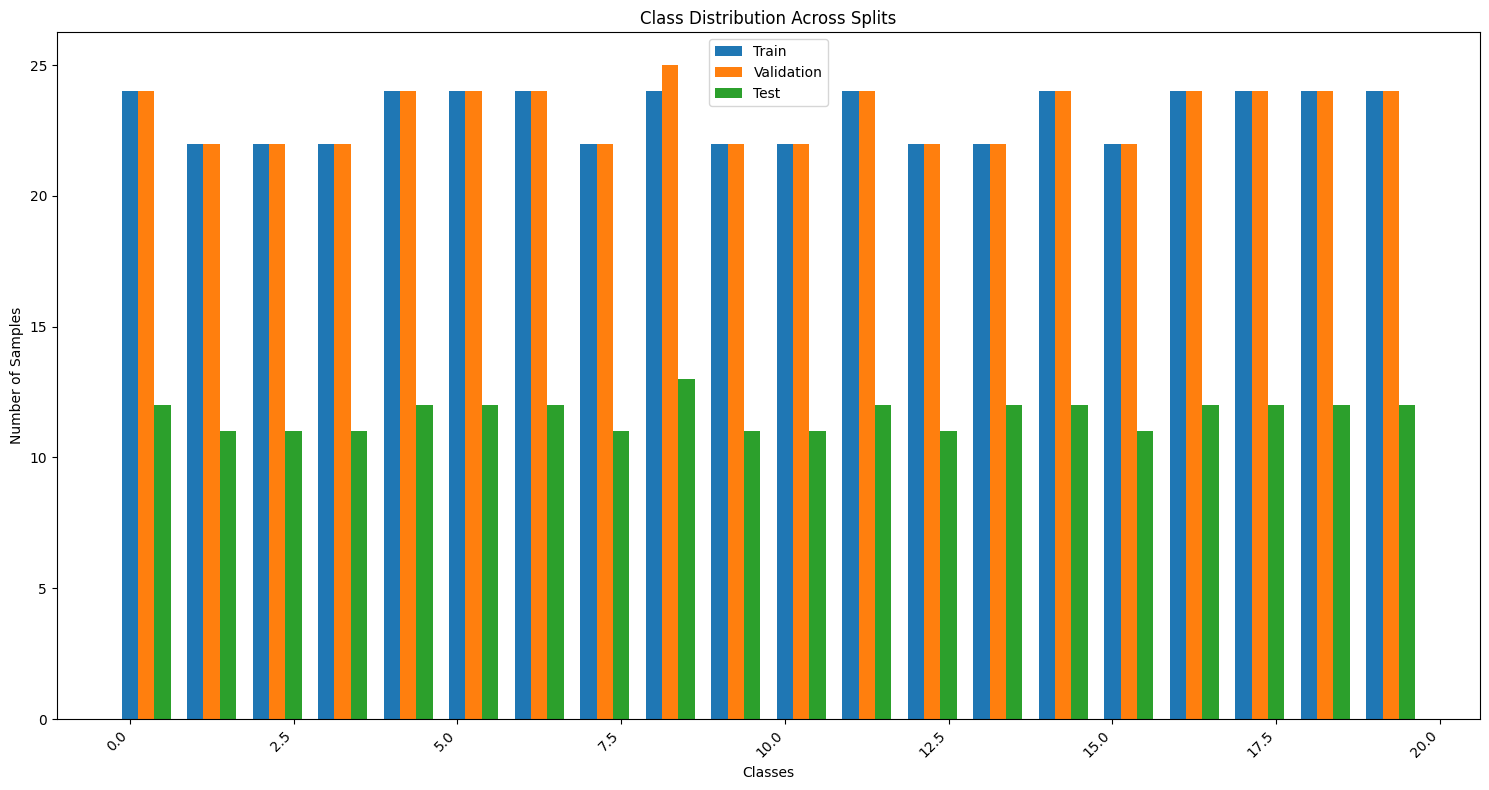

In [4]:
# Cell 3: Visualize class representation
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(15, 8))
plt.title("Class Distribution Across Splits")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')

# Plot each split
classes = list(CLASSES2IDX.keys())
train_counts = [split_counts[cls]['Train'] for cls in classes]
val_counts = [split_counts[cls]['Validation'] for cls in classes]
test_counts = [split_counts[cls]['Test'] for cls in classes]

bar_width = 0.25
index = range(len(classes))

plt.bar(index, train_counts, bar_width, label='Train')
plt.bar([i + bar_width for i in index], val_counts, bar_width, label='Validation')
plt.bar([i + 2*bar_width for i in index], test_counts, bar_width, label='Test')

plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Cell 4: Check for classes with zero samples in any split
zero_in_split = {}

for cls in CLASSES2IDX:
    counts = split_counts[cls]
    issues = []
    
    if counts['Train'] == 0:
        issues.append('Train')
    if counts['Validation'] == 0:
        issues.append('Validation')
    if counts['Test'] == 0:
        issues.append('Test')
    
    if issues:
        zero_in_split[cls] = issues

if zero_in_split:
    print("Classes with zero samples in splits:")
    for cls, splits in zero_in_split.items():
        print(f"- {cls}: {', '.join(splits)}")
else:
    print("All classes have samples in all splits!")

All classes have samples in all splits!


In [31]:
from dataset import TestDatasets
from utils import CLASSES2IDX

malta_test = TestDatasets(
    csv_file="/mnt/G-SSD/BRACIS/BRACIS-2024/dataset_intersections/matched_labels_with_tensors.csv"
)
print("Malta Test Classes:", malta_test.class_to_idx)
# Ensure all labels are in CLASSES2IDX
# assert all(label in CLASSES2IDX for label in malta_test.df['label'])

Malta Test Classes: {'acontecer': 0, 'aluno': 1, 'amarelo': 2, 'america': 3, 'aproveitar': 4, 'bala': 5, 'banco': 6, 'banheiro': 7, 'barulho': 8, 'cinco': 9, 'conhecer': 10, 'espelho': 11, 'esquina': 12, 'filho': 13, 'maca': 14, 'medo': 15, 'ruim': 16, 'sapo': 17, 'vacina': 18, 'vontade': 19}


In [21]:
malta_dataset = pd.read_csv('/mnt/G-SSD/BRACIS/BRACIS-2024/dataset_intersections/matched_labels_with_tensors_copy.csv')

# count how many labels are there for each dictionary
display(malta_dataset['dictionary'].value_counts())

# count how many unique labels are there for each dictionary
display(malta_dataset.groupby('dictionary')['label'].nunique())

UFPE                27
Acessibilidades2    26
Acessibilidades3    24
UFSC                19
UFSC_V2             19
SpreadTheSign       16
Name: dictionary, dtype: int64

dictionary
Acessibilidades2    19
Acessibilidades3    18
SpreadTheSign       15
UFPE                 9
UFSC                18
UFSC_V2             18
Name: label, dtype: int64